In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
print(tf.__version__)

2.0.0


In [2]:
listt = []
for i in range(0,5):
    listt.append(i)
print(listt[-2:])

[3, 4]


In [3]:
train_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/14774/536888/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1571172704&Signature=cYkZhibJxJNfsTm7aciCcxKVEcVpfazueA5Mf%2B93FT1yHTkw3cstWBnI%2BihIQxS3kF9xsWsaIqeknROVPwU0tIXeYzJM8upNDxAmJsVts1xK1y5lHtdXpjqxoLWxHHqwfG9U1%2FK8%2Beyt2boHKj8MXg2%2F2dLy1%2BBlX1n%2FeixVhHn92PjhIzHUAbmC%2BSljJrF99wtqM7NUfAhZMf0gulmh5rtdqp8if1SCpA0LlU%2FiI7vNBHNdiwHyUNMIO%2FF%2B9YGmOAjtmJ%2B2Jhb1XpePlfQCd2YZdHsobSbZWa2r299hetsF%2F3e2wIQ47gp3nUymAWS1Cw4kJ2mH9vpGBNFsrAJd0A%3D%3D'
test_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/14774/536888/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1571173018&Signature=ng3iqZp25Q5TUJ8KISLf4xJNTgMs0UTY1Y1LYRQt9gmNlaD3LL6e7Gu0DeeKSlapoAj1TR7AgZNmpNzADkCvktlCu1o8%2FcSdW5fdse%2B5ApFuDwB8ViA2EGnOHRANnfTCxxvPYRn3GOX8DjM%2BxnXncMFPW14McFLQf09dOEbG0uDtY9VnZv5a0c8hvq6Pdh36AjrnYHbL9SVi%2FXewBywHrHWAgE%2BGO6D2HI0Cr%2BFJfbk5jnavOom%2BD1R%2FKKuEMVptgzXzDT%2FZNPzYG9MsuScOHkHpX6YPq4Na80zRsfqMFqHKT9lJlRl%2B9kPOJM15F7DObTs0%2FrdZDedqFFsV9uprgw%3D%3D'
sample_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/14774/536888/sample_submission.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1571173040&Signature=CUMXfwCEfil%2BGnb3GyyPqEGqGlkaIuBpM08orWiCRYX1AS2q9PhWnBa9DlRjBWPwW1LU0iCD0MfRCV5XVij6SBt4%2BBBwSAz4ZvHIzMIhEpuyemPqUM8KjHh1SIfDDAmyXHkgZDqQPy4y39cd0KOjxPCiObs5QeoXgUwBUggJeTRcCw2VwKUgBJ661LIdzwQzx1U%2FvUwBf3eUhpzLbLkYsNzbCEbMtMt9bzC7Lng7AjR6zgbN2xAqqZ9Jz7SUfzxsKo2Qi%2FjuFw%2Bu%2FcHayt3MVBa%2FsPcZu%2BzYaLb%2F9ZSWveDVyzdhCIlxfKt76uj8KYdTQdYbR3uEUVI2FTqm1SxDXA%3D%3D'


In [4]:
df = pd.read_csv(train_url)
df.to_csv('/Users/stefanflorin/Desktop/train.csv')

In [5]:
base_image_dir = os.path.join('/Users/stefanflorin/Desktop/ML-DATASETS', '/Kaggle/')
train_dir = os.path.join(base_image_dir, 'train_images/')
df['path'] = df['id_code'].map(lambda x: os.path.join(train_dir, '{}.png'.format(x)))
df = df.drop(columns=['id_code'])
df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe
df.head(10)

diagnosis                                   path
0          2  /Kaggle/train_images/1c6d119c3d70.png
1          2  /Kaggle/train_images/367c7049929c.png
2          0  /Kaggle/train_images/726dff37edc0.png
3          3  /Kaggle/train_images/498f143c0374.png
4          0  /Kaggle/train_images/5b32ece9c627.png
5          0  /Kaggle/train_images/3f82631e9080.png
6          0  /Kaggle/train_images/e9ce5bf645ab.png
7          2  /Kaggle/train_images/98e8adcf085c.png
8          2  /Kaggle/train_images/d1fb4efb117c.png
9          0  /Kaggle/train_images/43f22d1be8dd.png

In [6]:
len_df = len(df)
print(f'There are {len_df} images')

There are 3662 images


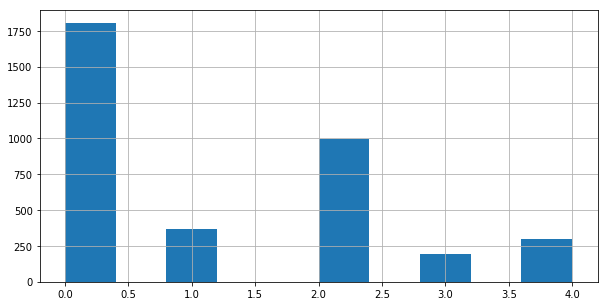

In [7]:
#Visualization of target classes
df['diagnosis'].hist(figsize = (10,5))

In [44]:
#Splitting train set into 70% training and 30% into validation 
for i in range(0, 2562):
    if(df.at[i, 'diagnosis'] == 0):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/No_DR/" + core_file[21:])
    if(df.at[i, 'diagnosis'] == 1):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/Mild/" + core_file[21:])
    if(df.at[i, 'diagnosis'] == 2):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/Moderate/" + core_file[21:])
    if(df.at[i, 'diagnosis'] == 3):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/Severe/" + core_file[21:])
    if(df.at[i, 'diagnosis'] == 4):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/Proliferative_DR/" + core_file[21:])

In [45]:
#Rest of 30% to validation
for i in range(2562, len(df)):
    if(df.at[i, 'diagnosis'] == 0):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/validation_images/No_DR/" + core_file[21:])
    if(df.at[i, 'diagnosis'] == 1):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/validation_images/Mild/" + core_file[21:])
    if(df.at[i, 'diagnosis'] == 2):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/validation_images/Moderate/" + core_file[21:])
    if(df.at[i, 'diagnosis'] == 3):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/validation_images/Severe/" + core_file[21:]) 
    if(df.at[i, 'diagnosis'] == 4):
        core_file = df.at[i, 'path']
        shutil.move("/Users/stefanflorin/Desktop/ML-DATASETS" + core_file, "/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/validation_images/Proliferative_DR/" + core_file[21:])

In [52]:
#Plot fct for visualizing images 
import matplotlib.image as mpimg

def plot_imgs(img_dir, top=25):
    all_item_dirs = os.listdir(img_dir)
    item_files = [os.path.join(img_dir, file) for file in all_item_dirs][:top]

    plt.figure(figsize=(15,15))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5,5, idx+1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
    plt.tight_layout()

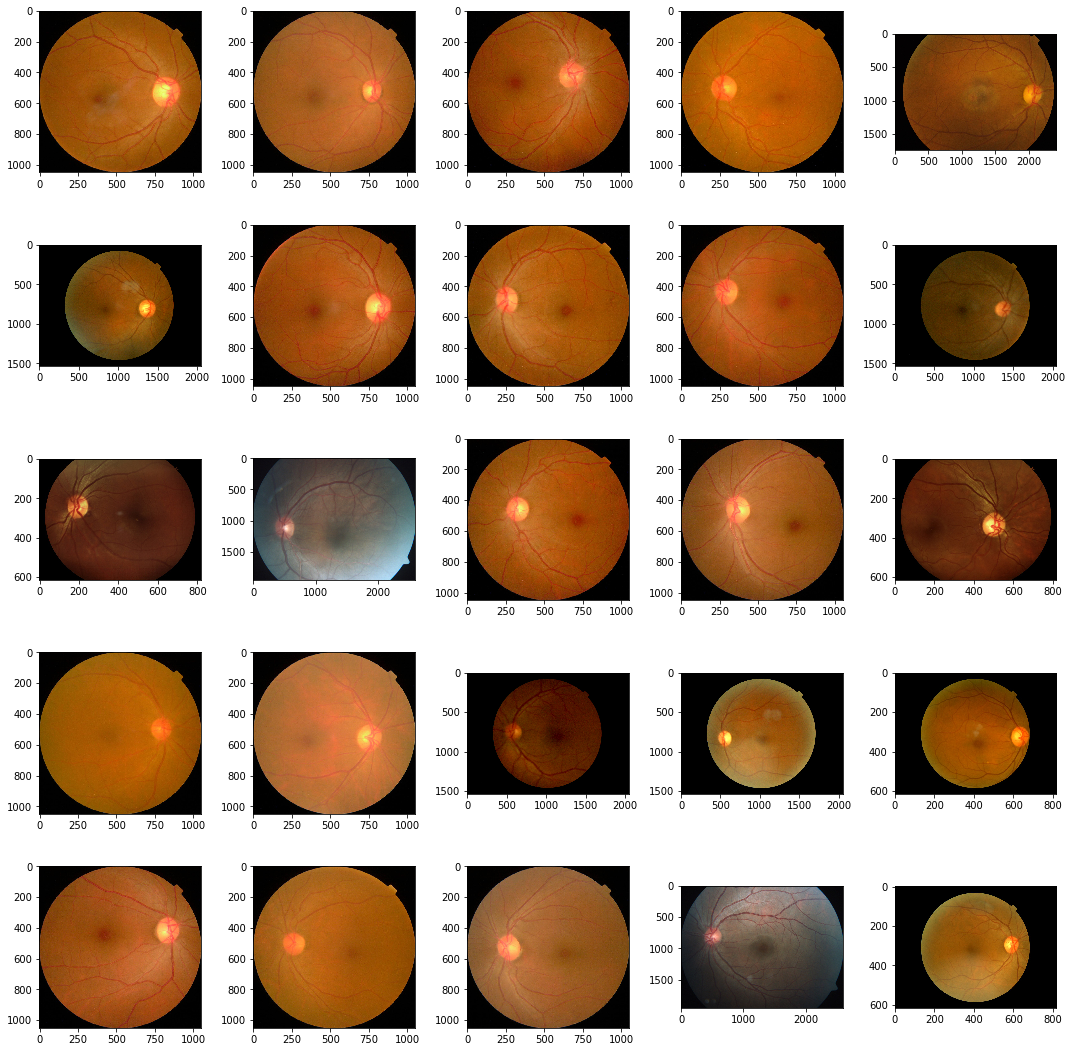

In [53]:
plot_imgs("/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/No_DR")

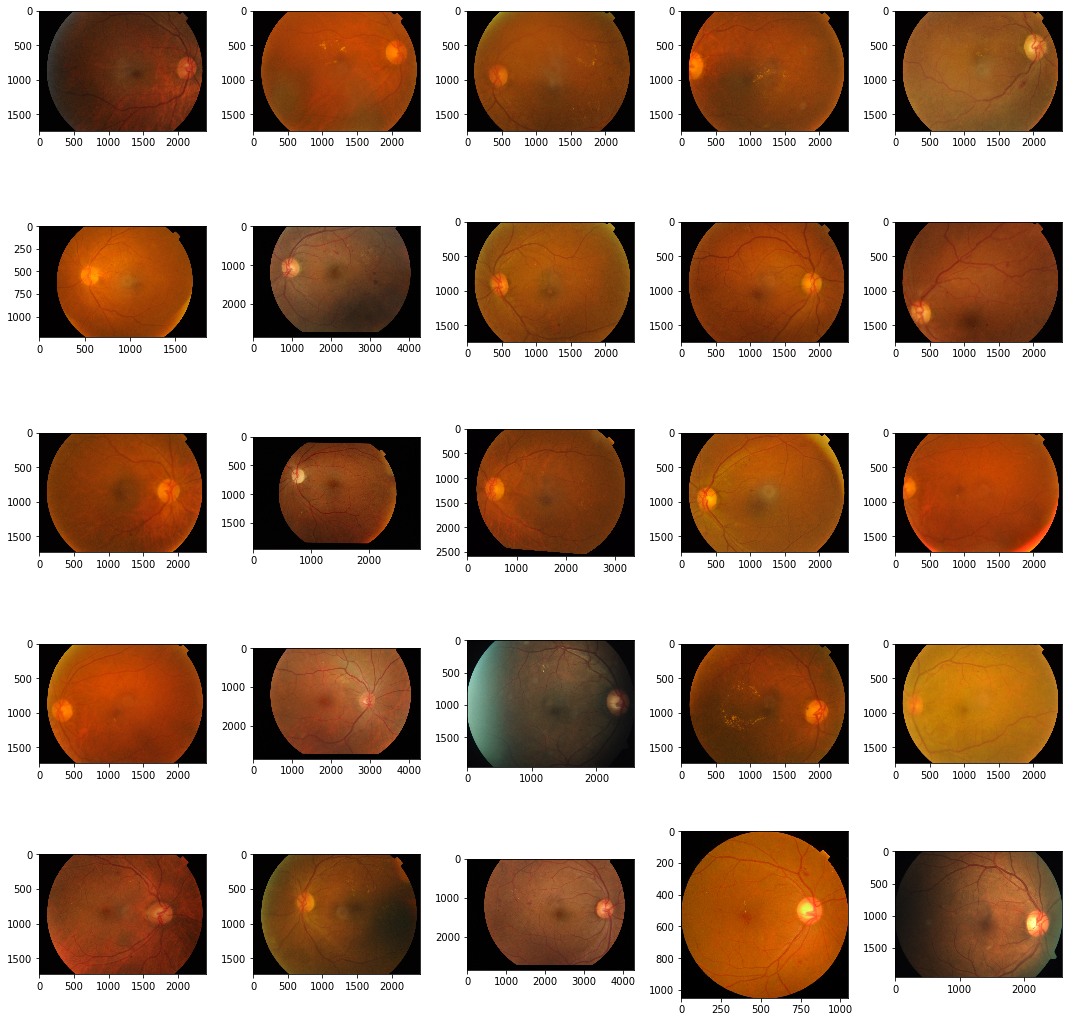

In [54]:
plot_imgs("/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/Mild")

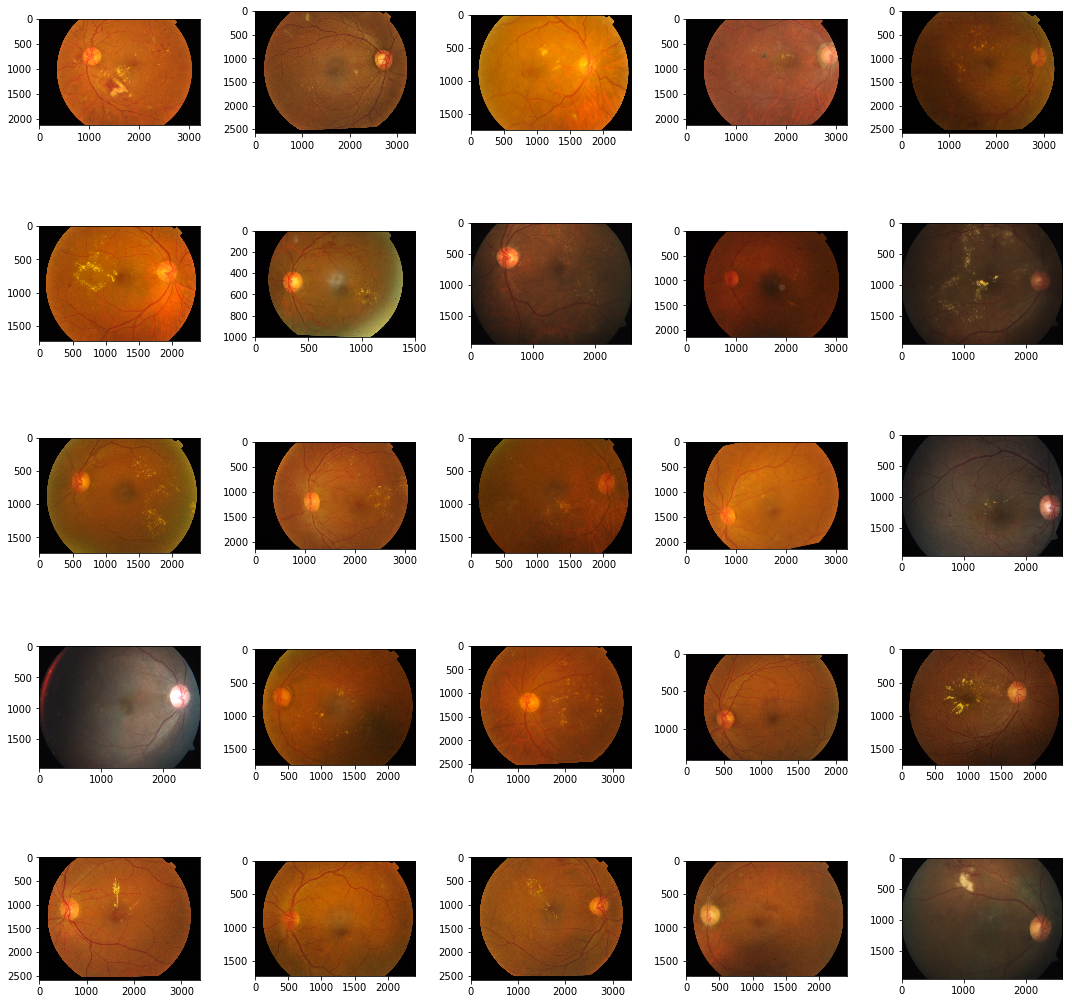

In [55]:
plot_imgs("/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/Moderate")

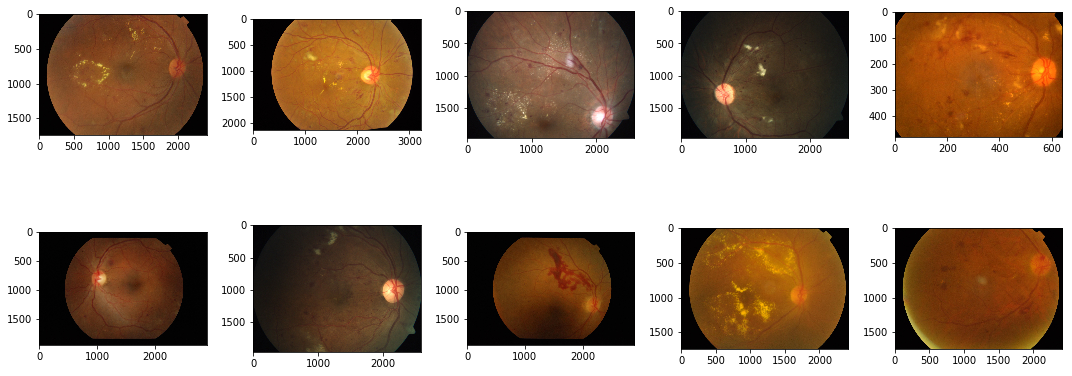

In [59]:
plot_imgs("/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/Severe", top = 10)

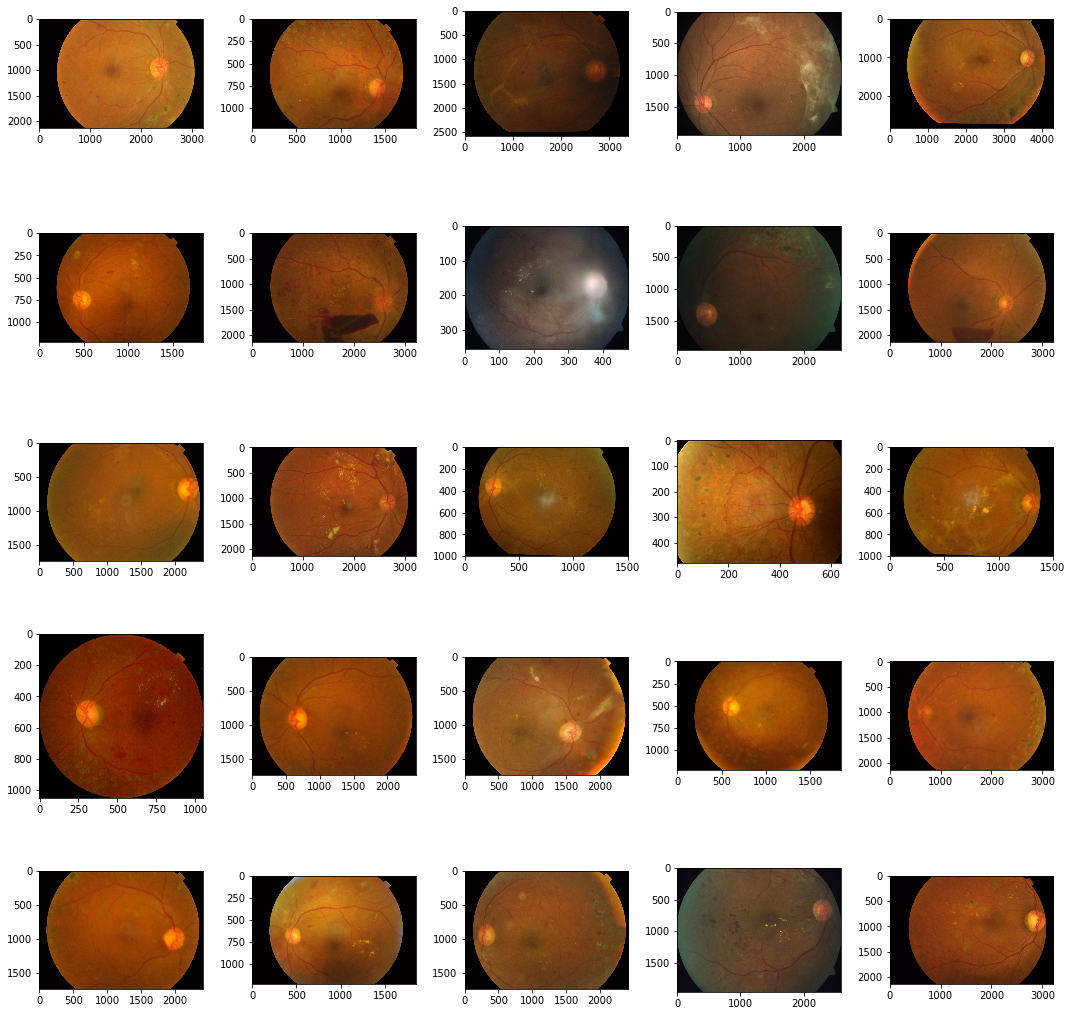

In [58]:
plot_imgs("/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/Proliferative_DR")

In [86]:
#Data augmentation 
image_gen_train = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size = 100,
                                                    directory = '/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/train_images/',
                                                    shuffle = True, 
                                                    target_size = (150, 150),
                                                    class_mode = 'categorical')

Found 2562 images belonging to 5 classes.


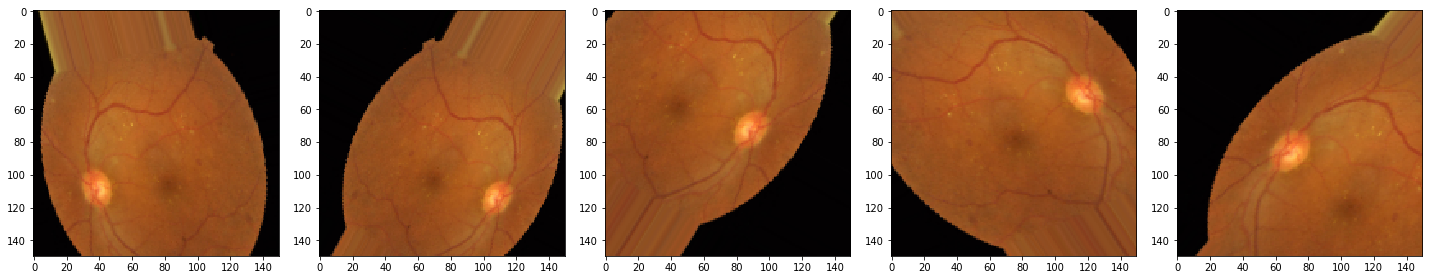

In [61]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, axes in zip(images_arr, axes):
        axes.imshow(img)
    plt.tight_layout()
    plt.show()
plotImages(augmented_images)

In [62]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = 100,
                                                directory = '/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/validation_images/',
                                                shuffle = True,
                                                target_size = (150, 150))

Found 1100 images belonging to 5 classes.


In [76]:
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])


In [77]:
"""
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [78]:
"""
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)      

In [95]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='sigmoid')
])


#Model Compilation
model.compile( loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 17, 17, 128)      

In [96]:
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=100,
      epochs=10,
      validation_data=val_data_gen,
      validation_steps=len(val_data_gen),
      verbose=1
)

Epoch 1/10
100/100 [==============================] - 1360s 14s/step - loss: 0.3773 - accuracy: 0.8300 - val_loss: 0.3060 - val_accuracy: 0.8784
Epoch 2/10
100/100 [==============================] - 1331s 13s/step - loss: 0.2877 - accuracy: 0.8799 - val_loss: 0.2812 - val_accuracy: 0.8916
Epoch 3/10
100/100 [==============================] - 1284s 13s/step - loss: 0.2748 - accuracy: 0.8847 - val_loss: 0.2644 - val_accuracy: 0.8915
Epoch 4/10
100/100 [==============================] - 1215s 12s/step - loss: 0.2681 - accuracy: 0.8878 - val_loss: 0.2757 - val_accuracy: 0.8955
Epoch 5/10
100/100 [==============================] - 1236s 12s/step - loss: 0.2610 - accuracy: 0.8910 - val_loss: 0.2604 - val_accuracy: 0.8938
Epoch 6/10
100/100 [==============================] - 1154s 12s/step - loss: 0.2600 - accuracy: 0.8924 - val_loss: 0.2628 - val_accuracy: 0.8918
Epoch 7/10
100/100 [==============================] - 1170s 12s/step - loss: 0.2559 - accuracy: 0.8941 - val_loss: 0.2697 - val_ac

In [99]:
def plot_learning_curve(history, epoch):
    #Plot training and validation accuracy
    epoch_range = range(1, epoch + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()
    
    #Plot training and validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()

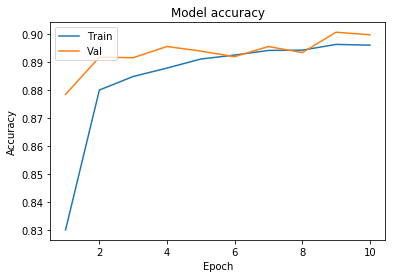

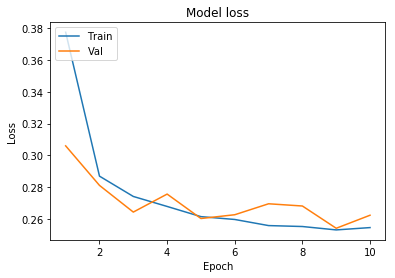

In [100]:
plot_learning_curve(history, 10)

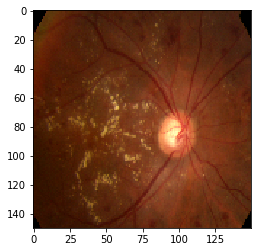

[[0. 0. 1. 0. 0.]]
Moderate


In [101]:
#Testing one image from test set
from keras.preprocessing.image import image, img_to_array, load_img
from keras.applications.resnet50 import preprocess_input
img = load_img('/Users/stefanflorin/Desktop/ML-DATASETS/Kaggle/test_images/0a2b5e1a0be8.png', target_size=(150, 150))
plt.imshow(img)
plt.show()

numpy_image = img_to_array(img)
image_batch = np.expand_dims(numpy_image, axis = 0)

processed_image = preprocess_input(image_batch.copy())
predictions = model.predict(processed_image)

result = np.argmax(predictions)
print(predictions)

if(result==0):
    print('No DR')
elif result == 1:
    print ('Mild')
elif result == 2:
    print('Moderate')
elif result == 3:
    print('Severe')
elif result == 4:
    print('Proliferative_DR')